# Exemplo de Consulta a API do IBGE

In [78]:
!pip install requests
import pandas as pd
import requests
import pprint as pp

In [79]:
nome_consulta = 'PNAD_5932'
# Link obtido atravez do https://servicodados.ibge.gov.br/api/docs/agregados?versao=3#api-bq query builder
pnad_url = "https://servicodados.ibge.gov.br/api/v3/agregados/4662/periodos/2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2022|2023/variaveis/5932?localidades=N3[all]&classificacao=888[47946]"

response = requests.get(pnad_url)

# Verificando erro na requisição
if response.status_code == 200:
    pnad_data = response.json()

    # Extract the relevant parts of the JSON structure
    results = pnad_data[0]['resultados']
    extracted_data = []
    for result in results:
        for serie in result['series']:
            row = {
                'Categoria': result['classificacoes'][0]['categoria']['47946'],#Codigo da categoria
                'Localidade': serie['localidade']['nome'],
                'Nivel': serie['localidade']['nivel']['nome'],
                'Valor': serie['serie']['2022'],
                'Unidade': pnad_data[0]['unidade'],
                'Variavel': pnad_data[0]['variavel']
            }
            extracted_data.append(row)

    # Convert the extracted data into a DataFrame
    df = pd.DataFrame(extracted_data)
    print(df)

else:
    print(f"Failed to fetch data. Status code: {response.status_code}")


   Categoria           Localidade                 Nivel Valor Unidade  \
0      Total             Rondônia  Unidade da Federação  2400   Reais   
1      Total                 Acre  Unidade da Federação  2294   Reais   
2      Total             Amazonas  Unidade da Federação  2035   Reais   
3      Total              Roraima  Unidade da Federação  2606   Reais   
4      Total                 Pará  Unidade da Federação  1917   Reais   
5      Total                Amapá  Unidade da Federação  2387   Reais   
6      Total            Tocantins  Unidade da Federação  2475   Reais   
7      Total             Maranhão  Unidade da Federação  1671   Reais   
8      Total                Piauí  Unidade da Federação  1886   Reais   
9      Total                Ceará  Unidade da Federação  1814   Reais   
10     Total  Rio Grande do Norte  Unidade da Federação  2213   Reais   
11     Total              Paraíba  Unidade da Federação  1923   Reais   
12     Total           Pernambuco  Unidade da Feder

In [80]:
df.to_csv(f'consulta_{nome_consulta}.csv', index=False)

In [81]:
nome_consulta_b = 'PNAD_8513'

In [82]:

# Link obtido atravez do https://servicodados.ibge.gov.br/api/docs/agregados?versao=3#api-bq query builder
##pnad_url = "https://servicodados.ibge.gov.br/api/v3/agregados/4662/periodos/2012|2013|2014|2015|2016|2017|2018|2019|2020|2021|2022|2023/variaveis/5932?localidades=N3[all]&classificacao=888[47946]"
pnad_url = "https://servicodados.ibge.gov.br/api/v3/agregados/8513/periodos/201512|201601|201602|201603|201604|201605|201606|201607|201608|201609|201610|201611|201612|201701|201702|201703|201704|201705|201706|201707|201708|201709|201710|201711|201712|201801|201802|201803|201804|201805|201806|201807|201808|201809|201810|201811|201812|201901|201902|201903|201904|201905|201906|201907|201908|201909|201910|201911|201912|202001|202002|202003|202004|202005|202006|202007|202008|202009|202010|202011|202012|202101|202102|202103|202104|202105|202106|202107|202108|202109|202110|202111|202112|202201|202202|202203|202204|202205|202206|202207|202208|202209|202210|202211|202212|202301|202302|202303|202304|202305|202306|202307|202308|202309|202310|202311|202312|202401|202402|202403|202404|202405|202406|202407/variaveis/12466?localidades=N1[all]"
response = requests.get(pnad_url)



In [83]:


# Make a request to the PNAD endpoint
response = requests.get(pnad_url)

# Check if the request was successful
if response.status_code == 200:
    # Convert the response to a DataFrame
    pnad_data = response.json()
    pp.pprint(pnad_data)

    # Extract the 'resultados' key from the first element of pnad_data
    resultados_data = pnad_data[0]['resultados']

    # Initialize a list to store the extracted data
    extracted_data = []

    # Iterate through each result
    for result in resultados_data:
        # Iterate through each serie in the result
        for serie in result['series']:
            # Iterate through each key-value pair in the serie
            for data, valor in serie['serie'].items():
                row = {
                    'Data': data,
                    'Valor': valor
                }
                extracted_data.append(row)

    # Convert the extracted data into a DataFrame
    df = pd.DataFrame(extracted_data)
    print(df)

else:
    print(f"Failed to retrieve data: {response.status_code}")

[{'id': '12466',
  'resultados': [{'classificacoes': [],
                  'series': [{'localidade': {'id': '1',
                                             'nivel': {'id': 'N1',
                                                       'nome': 'Brasil'},
                                             'nome': 'Brasil'},
                              'serie': {'201512': '38.3',
                                        '201601': '38.1',
                                        '201602': '38.2',
                                        '201603': '38.3',
                                        '201604': '38.5',
                                        '201605': '38.7',
                                        '201606': '38.6',
                                        '201607': '38.7',
                                        '201608': '38.4',
                                        '201609': '38.4',
                                        '201610': '38.5',
                                        '201

In [84]:
df['Data']= pd.to_datetime(df['Data'],format = '%Y%m')
df['Valor']= pd.to_numeric(df['Valor'])

In [85]:
df.head()

,Data,Valor
0,2015-12-01,38.3
1,2016-01-01,38.1
2,2016-02-01,38.2
3,2016-03-01,38.3
4,2016-04-01,38.5


In [86]:
df.to_csv(f'consulta_{nome_consulta_b}.csv', index=False)

<Axes: title={'center': 'Taxa de informalidade das pessoas de 14 anos ou mais de idade - Brasil'}, xlabel='Data'>

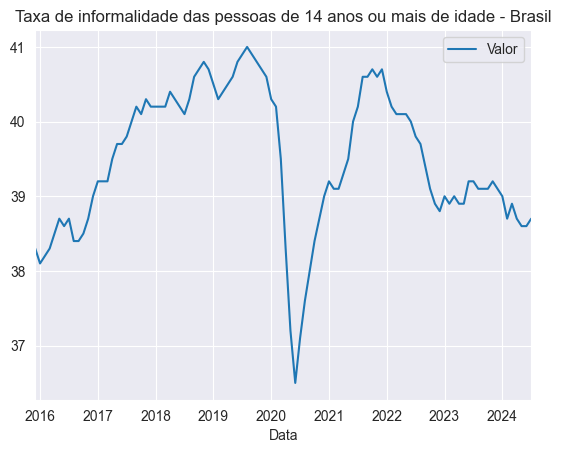

In [87]:
df.plot(x='Data', y='Valor', kind='line', title='Taxa de informalidade das pessoas de 14 anos ou mais de idade - Brasil')